* MSV_HoVaTen:
521H0501_Phan Minh Hoàng,
521H0398_Lê Nguyễn Viết Hiệp,
521H0276_Trang Sĩ Nam



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def visualize_metrics(metrics):
    
    # List of classifiers and metrics
    classifiers = list(metrics.keys())
    metric_names = list(metrics[classifiers[0]].keys())

    
    bar_width = 0.15  # Set the width of the bars
    padding = 0.05  # Adjust the padding value as desired

    # Set the positions of the x-axis ticks
    x_pos = np.arange(len(classifiers))

    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the bar chart size

    # Plot each metric as a group of bars
    for i, metric in enumerate(metric_names):
        metric_values = [metrics[classifier][metric] for classifier in classifiers]
        bar_positions = x_pos + ((bar_width + padding) * i)
        ax.bar(bar_positions, metric_values, bar_width, label=metric)

    # Set the labels and title
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Score')
    ax.set_title('Comparison of Metrics')
    ax.set_xticks(x_pos + (((bar_width + padding) * (len(metric_names) - 1)) / 2))
    ax.set_xticklabels(classifiers)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


    
    
def print_metrics(accuracy, precision, recall, f1):
        print("Accuracy: " + str(accuracy))
        print("Precision: " + str(precision))
        print("Recall: " + str(recall))
        print("F1-Score: " + str(f1))
        
    

In [3]:
data = pd.read_csv('bike_buyers.csv')
print(data.shape)

(1000, 13)


In [4]:
data = data.dropna()

In [5]:
# Check duplicate
data.duplicated().value_counts()

False    952
dtype: int64

In [6]:
data = data.drop_duplicates()
data.shape

(952, 13)

# Transformation

In [7]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

# Normalization


In [8]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(['Purchased Bike', 'ID'], axis=1)

scaler = MinMaxScaler()
model=scaler.fit(features)
scaled_data= pd.DataFrame(model.transform(features))

In [9]:
# split data
X = scaled_data
y = data['Purchased Bike']

# Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest, chi2
select_feature =  SelectKBest(score_func=chi2, k = 8)
f_best = select_feature.fit(X, y)               
X_new = f_best.transform(X)
X_new.shape

(952, 8)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, random_state = 42, test_size=0.2)

# K Nearest Neighbor

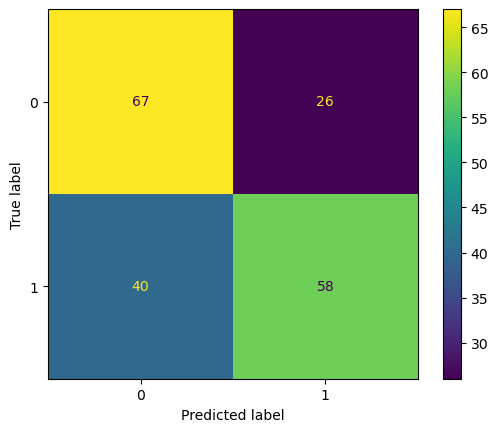

In [12]:
# Train model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
KNN.fit(X_train, Y_train)

# test model
Y_pred = KNN.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [13]:
knn_accuracy = accuracy_score(Y_test, Y_pred)
knn_precision = precision_score(Y_test, Y_pred)
knn_recall = recall_score(Y_test, Y_pred)
knn_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67        93
           1       0.69      0.59      0.64        98

    accuracy                           0.65       191
   macro avg       0.66      0.66      0.65       191
weighted avg       0.66      0.65      0.65       191



# Decision Tree

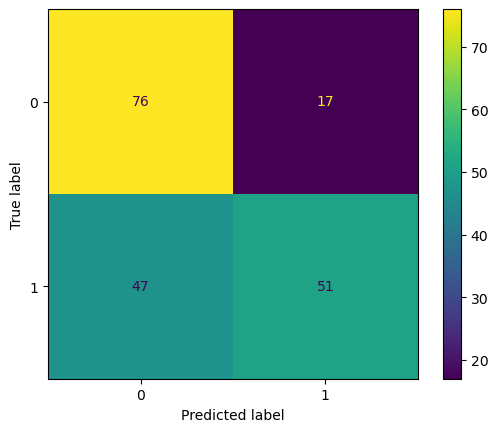

In [14]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(max_depth=7)
dTree.fit(X_train, Y_train)

Y_pred = dTree.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [15]:
dt_accuracy = accuracy_score(Y_test, Y_pred)
dt_precision = precision_score(Y_test, Y_pred)
dt_recall = recall_score(Y_test, Y_pred)
dt_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.70        93
           1       0.75      0.52      0.61        98

    accuracy                           0.66       191
   macro avg       0.68      0.67      0.66       191
weighted avg       0.69      0.66      0.66       191



# Gaussian Naive Bayes

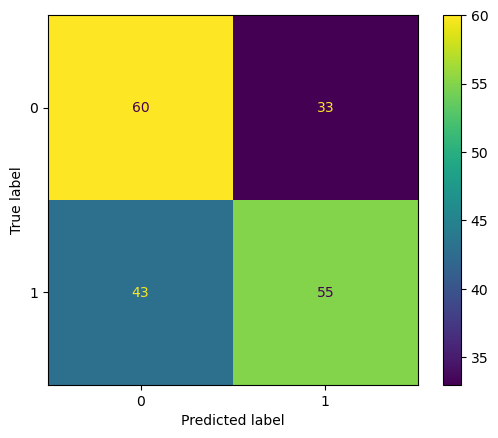

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# test model
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [17]:
GNB_accuracy = accuracy_score(Y_test, Y_pred)
GNB_precision = precision_score(Y_test, Y_pred)
GNB_recall = recall_score(Y_test, Y_pred)
GNB_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61        93
           1       0.62      0.56      0.59        98

    accuracy                           0.60       191
   macro avg       0.60      0.60      0.60       191
weighted avg       0.60      0.60      0.60       191



# Multinomial Naive Bayes

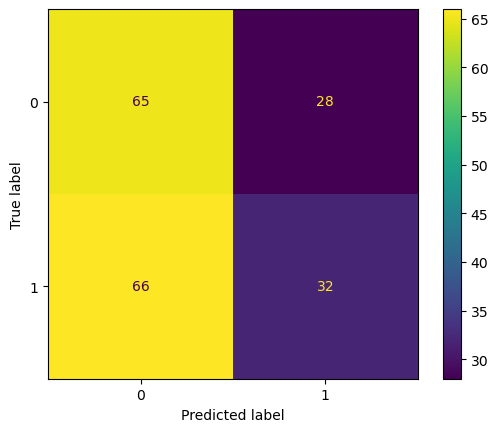

In [18]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

# test model
Y_pred = mnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [19]:
MNB_accuracy = accuracy_score(Y_test, Y_pred)
MNB_precision = precision_score(Y_test, Y_pred)
MNB_recall = recall_score(Y_test, Y_pred)
MNB_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58        93
           1       0.53      0.33      0.41        98

    accuracy                           0.51       191
   macro avg       0.51      0.51      0.49       191
weighted avg       0.52      0.51      0.49       191



# Bernoulli Naive Bayes

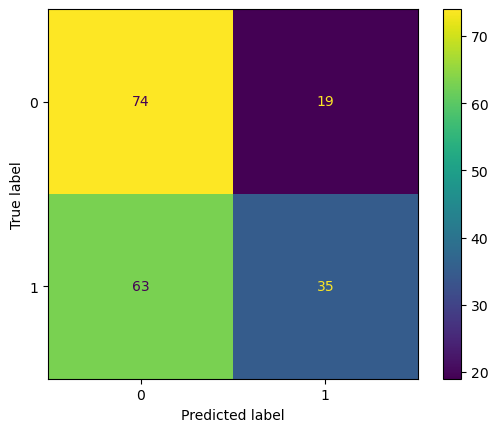

In [20]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
# test model
Y_pred = bnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [21]:
bnb_accuracy = accuracy_score(Y_test, Y_pred)
bnb_precision = precision_score(Y_test, Y_pred)
bnb_recall = recall_score(Y_test, Y_pred)
bnb_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.80      0.64        93
           1       0.65      0.36      0.46        98

    accuracy                           0.57       191
   macro avg       0.59      0.58      0.55       191
weighted avg       0.60      0.57      0.55       191



# Logistic Regession

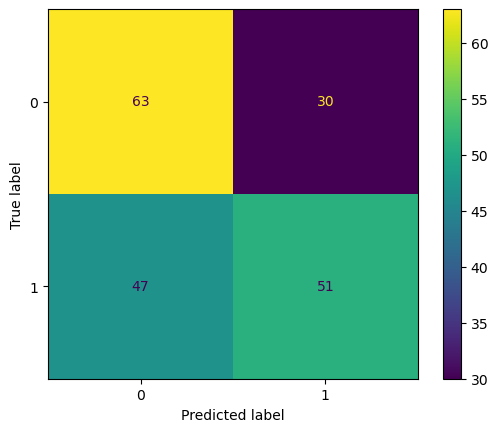

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [23]:
LogR_accuracy = accuracy_score(Y_test, Y_pred)
LogR_precision = precision_score(Y_test, Y_pred)
LogR_recall = recall_score(Y_test, Y_pred)
LogR_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.68      0.62        93
           1       0.63      0.52      0.57        98

    accuracy                           0.60       191
   macro avg       0.60      0.60      0.60       191
weighted avg       0.60      0.60      0.59       191



# Support Vector Machine

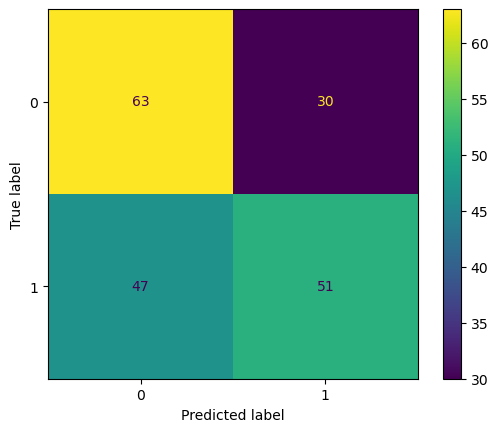

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ["linear", "poly","rbf", "sigmoid",]

svm = SVC(kernel="sigmoid", C=2.5)
svm.fit(X_train, Y_train)
# Evaluate the model on the test set
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [25]:
smv_accuracy = accuracy_score(Y_test, Y_pred)
smv_precision = precision_score(Y_test, Y_pred)
smv_recall = recall_score(Y_test, Y_pred)
smv_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.68      0.62        93
           1       0.63      0.52      0.57        98

    accuracy                           0.60       191
   macro avg       0.60      0.60      0.60       191
weighted avg       0.60      0.60      0.59       191



# Ensamble

* Bagging

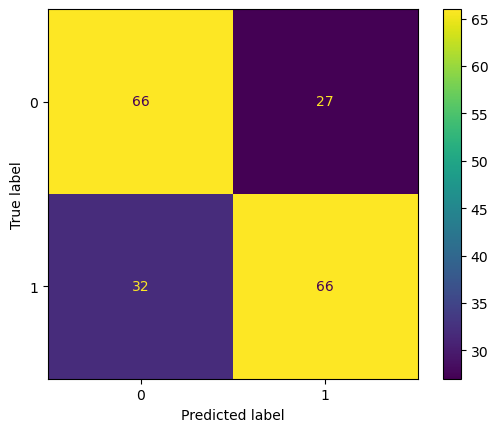

In [26]:
from sklearn.ensemble import BaggingClassifier


clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=10, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [27]:
be_accuracy = accuracy_score(Y_test, Y_pred)
be_precision = precision_score(Y_test, Y_pred)
be_recall = recall_score(Y_test, Y_pred)
be_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        93
           1       0.71      0.67      0.69        98

    accuracy                           0.69       191
   macro avg       0.69      0.69      0.69       191
weighted avg       0.69      0.69      0.69       191



* GradientBoosting

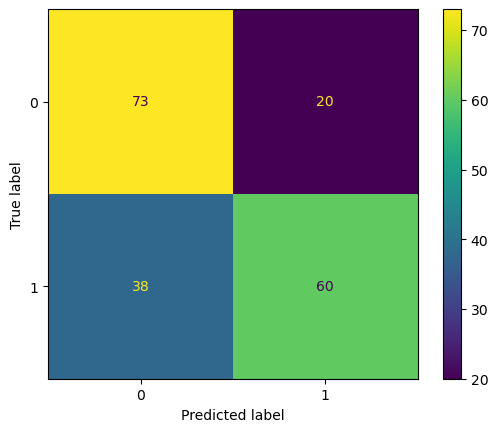

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [29]:
ge_accuracy = accuracy_score(Y_test, Y_pred)
ge_precision = precision_score(Y_test, Y_pred)
ge_recall = recall_score(Y_test, Y_pred)
ge_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72        93
           1       0.75      0.61      0.67        98

    accuracy                           0.70       191
   macro avg       0.70      0.70      0.69       191
weighted avg       0.71      0.70      0.69       191



* adaboost

Accuracy: 0.6282722513089005


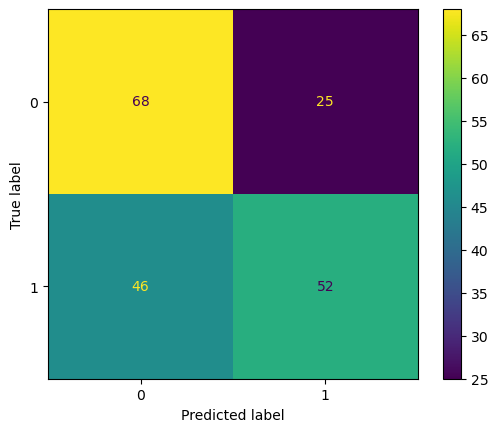

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Create and fit an AdaBoosted decision tree
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, Y_train)

Y_pred = ada_clf.predict(X_test)

# Create Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [31]:
ada_accuracy = accuracy_score(Y_test, Y_pred)
ada_precision = precision_score(Y_test, Y_pred)
ada_recall = recall_score(Y_test, Y_pred)
ada_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66        93
           1       0.68      0.53      0.59        98

    accuracy                           0.63       191
   macro avg       0.64      0.63      0.63       191
weighted avg       0.64      0.63      0.62       191



* Stack

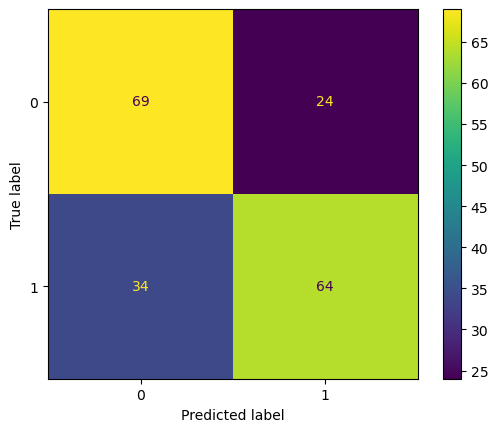

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

layer = list()

layer.append(('dt', DecisionTreeClassifier()))
layer.append(('bnb', BernoulliNB()))
layer.append(('svc', SVC()))

finalLayer = LogisticRegression()

model = StackingClassifier(estimators=layer, final_estimator=finalLayer, cv=5)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [33]:
se_accuracy = accuracy_score(Y_test, Y_pred)
se_precision = precision_score(Y_test, Y_pred)
se_recall = recall_score(Y_test, Y_pred)
se_f1 = f1_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        93
           1       0.73      0.65      0.69        98

    accuracy                           0.70       191
   macro avg       0.70      0.70      0.70       191
weighted avg       0.70      0.70      0.70       191



              precision    recall  f1-score   support

           0       0.71      0.75      0.73        93
           1       0.75      0.71      0.73        98

    accuracy                           0.73       191
   macro avg       0.73      0.73      0.73       191
weighted avg       0.73      0.73      0.73       191



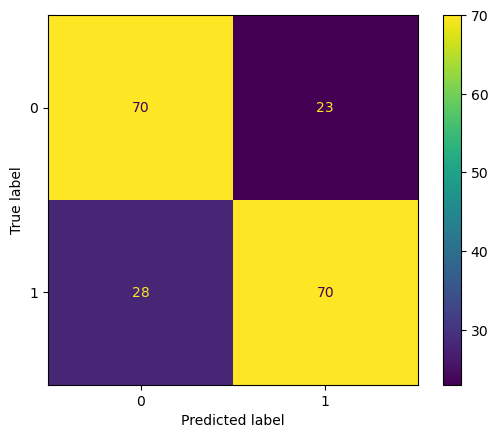

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Perform cross-validation and training
rf.fit(X_train, Y_train)

# Predict and evaluate performance
Y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
print(classification_report(Y_test, Y_pred_rf))

# Compare performance with Naive Bayes and Gradient Boosting

In [35]:
rf_accuracy = accuracy_score(Y_test, Y_pred)
rf_precision = precision_score(Y_test, Y_pred)
rf_recall = recall_score(Y_test, Y_pred)
rf_f1 = f1_score(Y_test, Y_pred)

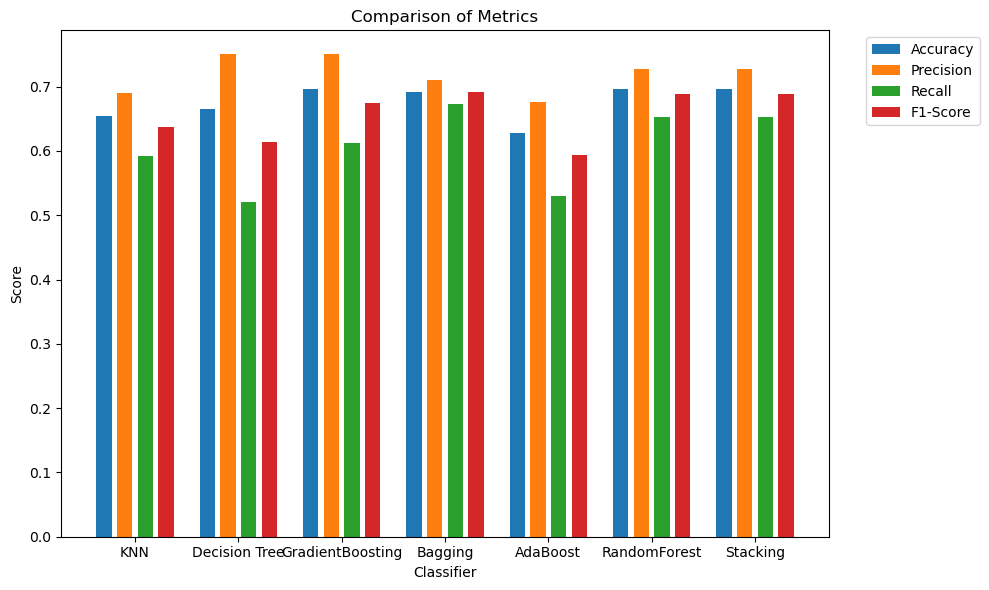

In [36]:

metrics = {
    'KNN': {
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1-Score': knn_f1
    },

    'Decision Tree': {
        'Accuracy': dt_accuracy,
        'Precision': dt_precision,
        'Recall': dt_recall,
        'F1-Score': dt_f1
    },

    'GradientBoosting': {
        'Accuracy': ge_accuracy,
        'Precision': ge_precision,
        'Recall': ge_recall,
        'F1-Score': ge_f1
    },
    
    
    'Bagging': {
        'Accuracy': be_accuracy,
        'Precision': be_precision,
        'Recall': be_recall,
        'F1-Score': be_f1
    },

    'AdaBoost': {
        'Accuracy': ada_accuracy,
        'Precision': ada_precision,
        'Recall': ada_recall,
        'F1-Score': ada_f1
    },
    
    'RandomForest': {
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1-Score': rf_f1
    },
    
    'Stacking': {
        'Accuracy': se_accuracy,
        'Precision': se_precision,
        'Recall': se_recall,
        'F1-Score': se_f1
    }
}

visualize_metrics(metrics=metrics)
